In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### **Import, analyze, clean, and preprocess a “real-world” classification dataset.**

In [2]:
# Import our input dataset
df = pd.read_csv('./Resources/charity_data.csv')
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


#### **Inspect Data**

In [3]:
# show number of columns and rows
df.shape

(34299, 12)

In [4]:
# show DF Columns
df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [5]:
# Return data types
df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

#### **Clean Data**

In [6]:
# Return columns with Null values 
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column EIN has 0 null values
Column NAME has 0 null values
Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [7]:
# Retrun df duplicates
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [8]:
# Print out the EIN value counts
EIN_counts = df.EIN.value_counts()
EIN_counts

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

#### **Summary**
- The EIN's column will not be required in our analysis, all counts have unique values.

In [9]:
# Remove the column
df.drop(columns=["EIN"], inplace=True)
df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
# Print out the NAME value counts
NAME_counts = df.NAME.value_counts()
NAME_counts

PARENT BOOSTER USA INC                                                   1260
TOPS CLUB INC                                                             765
UNITED STATES BOWLING CONGRESS INC                                        700
WASHINGTON STATE UNIVERSITY                                               492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                           408
                                                                         ... 
BOEING EMPLOYEES KARATE ASSOCIATION - SEATTLE                               1
SILICON VALLEY CHAPTER OF THE RISK & INSURANCE MANAGEMENT SOCIETY INC       1
MONTEREY PARK SPORTS CLUB BASEBALL                                          1
KIDS CANCERVIVE                                                             1
MCKINLEY HIGH SCHOOL ALUMNI ASSOCIATION                                     1
Name: NAME, Length: 19568, dtype: int64

#### **Summary**
- The first five values returned frequently in the dataset, the lower returned values only produce a value = 1, this is inconsistant

In [11]:
# Remove the column
df.drop(columns=["NAME"], inplace=True)
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Application type counts
APPLICATION_TYPE_counts = df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

The **APPLICATION_TYPE** columns variables appear a lot in of dataset, they are a feature of our model

### **Categorical Variables using one-hot encoding** 
- One-hot encoding identifies all unique column values and splits the single categorical column into a series of columns, each containing information about a single unique categorical value
- Although one-hot encoding is a very robust solution, it can be very memory-intensive. Therefore, categorical variables with a large number of unique values might become difficult to navigate or filter once encoded.

### **Bucketing or binning**
**The process of reducing the number of unique categorical values in a dataset is known as bucketing or binning**
- Bucketing data typically follows one of two approaches:
- 1) Collapse all of the infrequent and rare categorical values into a single “other” category.
- 2) Create generalized categorical values and reassign all data points to the new corresponding values

#### **Summary**

Looking at the APPLICATION_TYPE unique value counts, there are a number of entries that appear frequently in the dataset, however, many other appear semi-frequently and even more rarely appear in the dataset. The most straightforward method is to use a density plot to identify where the value counts “fall off” and set the threshold within this region.

The process of **bucketing** and **encoding** are two of the most common preprocessing steps required to set up your neural network training datasets. As with many other data science techniques, it might seem complicated at first, but it will become easier with practice.

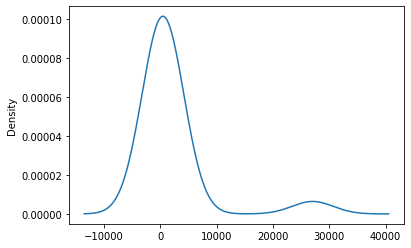

In [13]:
# Visualize the value counts
APPLICATION_TYPE_counts.plot.density()

#### **Tasks**
According to the density plot, the most common unique values have more than 1000 instances within the dataset. Therefore, we can bucket any occurence that appears fewer than 1000 times in the dataset as “other.” To do this, we’ll use a Python for loop and Pandas’ replace method. 
- Determine which values to replace
- Replace in DataFrame
- Check to make sure binning was successful


In [14]:
# replace values
replace_APPLICATION_TYPE = list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts < 1000].index)

# use for loop to replace values
for i in replace_APPLICATION_TYPE:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(i,"Other")

# Bucketing sucess
df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

#### **Tasks**
Now that we have reduced the number of unique values in the country variable, we’re ready to transpose the variable using one-hot encoding. The easiest way to perform **one-hot encoding** in Python is to use Scikit-learn’s **OneHotEncoder** module on the country variable. To build the encoded columns, we must **create an instance** of OneHotEncoder and **“fit”** the encoder with our values.

In [15]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.APPLICATION_TYPE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['APPLICATION_TYPE'])
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


#### **Tasks**
We must join the encoded DataFrame with the original and drop the original **APPLICATION_TYPE**. The process of joining the two DataFrames together is handled by the Pandas **merge method** and can be performed within one line. 

In [16]:
# Merge MEthod to join dataframes
df1 = df.merge(encode_df,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)

In [17]:
# Return df1
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [18]:
# Print out the AFFILIATION value counts
AFFILIATION_counts = df.AFFILIATION.value_counts()
AFFILIATION_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

From the returned results from the data, Independent and CompanySponsored appeared frequently, the oher ones appear less frequently. The AFFILIATION column variables are features for our model

#### **Tasks: Encode categorical variables using one-hot encoding**
Now that we have our variable names separated, we can start to preprocess our data starting with the **one-hot encoding** of the categorical data
- Create OneHotEncoder Instance
- Fit encoder to produce dataframe
- Rename the encoded columns
- Merge dataframes

In [19]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.AFFILIATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['AFFILIATION'])
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Merge the two DataFrames,drop  AFFILIATION column
df2 = df1.merge(encode_df,left_index=True,right_index=True).drop("AFFILIATION",1)

In [21]:
# Return df2
df2.head()

,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# Print out the CLASSIFICATION value counts
CLASSIFICATION_counts = df2.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C2170        1
C2150        1
C2500        1
C1370        1
Name: CLASSIFICATION, Length: 71, dtype: int64

The returned results indicicated that C1000, C2000 and C1200 appeared the most frequently, the other ones appeared less frequent, The classification column will be removed

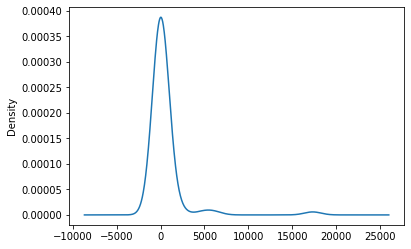

In [23]:
# Visualize the value counts
CLASSIFICATION_counts.plot.density()

### **Tasks**
According to the density plot, the most common unique values have more than 1000 instances within the dataset. Therefore, we can bucket any CLASSIFICATION that appears fewer than 1000 times in the dataset as “other.”
- Determine which values to replace
- Replace in DataFrame
- Check to make sure binning was successful


In [24]:
# Determine which values to replace
replace_CLASSIFICATION = list(CLASSIFICATION_counts[CLASSIFICATION_counts < 1000].index)

# Replace in DataFrame
for i in replace_CLASSIFICATION:
    df2.CLASSIFICATION = df2.CLASSIFICATION.replace(i,"Other")


# Check to make sure binning was successful
df2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

#### **Tasks**
Now that we have reduced the number of unique values in the country variable, we’re ready to transpose the variable using one-hot encoding. The easiest way to perform **one-hot encoding** in Python is to use Scikit-learn’s **OneHotEncoder** module on the country variable. To build the encoded columns, we must **create an instance** of OneHotEncoder and **“fit”** the encoder with our values.

In [25]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df2.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CLASSIFICATION'])
encode_df.head()

,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


#### **Tasks**
We must join the encoded DataFrame with the original and drop the original **CLASSIFICIATION**. The process of joining the two DataFrames together is handled by the Pandas **merge method** and can be performed within one line. 

In [26]:
# Merge the two DataFrames together and drop the CLASSIFICATION column
df3 = df2.merge(encode_df,left_index=True,right_index=True).drop("CLASSIFICATION",1)

In [27]:
# Return df3
df3.head()

,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,...,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### **Next we analyse the USE_CASE column**

In [28]:
# Print out the USE_CASE value counts
USE_CASE_counts = df.USE_CASE.value_counts()
USE_CASE_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

The USE_CASE column varibles contains four values + other in our count, These are feautures for our model

In [29]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df3.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['USE_CASE'])
encode_df.head()

,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [30]:
# Merge DataFrames, drop the USE_CASE column
df4 = df3.merge(encode_df,left_index=True,right_index=True).drop("USE_CASE",1)


In [31]:
# Return df4
df4.head()

,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# ORGANIZATION counts
ORGANIZATION_counts = df.ORGANIZATION.value_counts()
ORGANIZATION_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

It returned four values , it will considered as a feature for our model

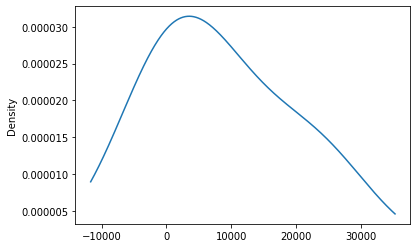

In [33]:
# Visualize the value counts
ORGANIZATION_counts.plot.density()

In [34]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df4.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['ORGANIZATION'])
encode_df.head()

,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [35]:
# Merge DataFrames, drop the ORGANIZATION column
df5 = df4.merge(encode_df,left_index=True,right_index=True).drop("ORGANIZATION",1)

In [36]:
# Return df5
df5.head()

,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### **Next we analyse the STATUS column**

In [37]:
# Print out the STATUS value counts
STATUS_counts = df.STATUS.value_counts()
STATUS_counts

1    34294
0        5
Name: STATUS, dtype: int64

Returned two values, it will be a feature for our model

In [38]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df5.STATUS.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['STATUS'])
encode_df.head()

,STATUS_0,STATUS_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [39]:
# Merge DataFrames, drop the STATUS column
df6 = df5.merge(encode_df,left_index=True,right_index=True).drop("STATUS",1)


In [40]:
# Return df6
df6.head()

,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,STATUS_0,STATUS_1
0,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


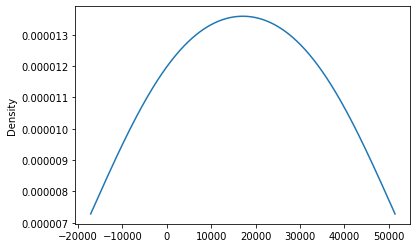

In [41]:
# Visualize the value counts
STATUS_counts.plot.density()

#### **Next we analyse the INCOME_AMT column**

In [42]:
# Print out the INCOME_AMT value counts
INCOME_AMT_counts = df.INCOME_AMT.value_counts()
INCOME_AMT_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

Retruned 9 values, it will be considered as a feature of our model

In [43]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df6.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['INCOME_AMT'])
encode_df.head()

,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Merge DataFrames, drop the INCOME_AMT column
df7 = df6.merge(encode_df,left_index=True,right_index=True).drop("INCOME_AMT",1)

In [45]:
# return df 7
df7.head()

,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,STATUS_1,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


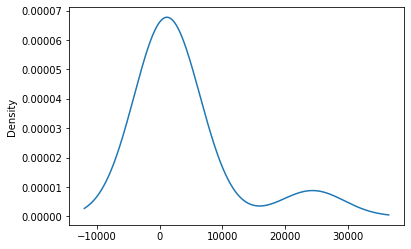

In [46]:
# Visualize the value counts
INCOME_AMT_counts.plot.density()

#### **Next we analyse the SPECIAL_CONSIDERATION column**

In [47]:
SPECIAL_CONSIDERATIONS_counts = df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [48]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df7.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['SPECIAL_CONSIDERATIONS'])
encode_df.head()

,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [49]:
# merge dataframes
df8 = df7.merge(encode_df,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)

In [50]:
# Return df8
df8.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### **Next we analyse the ASK_AMT column**

In [51]:
# Print out the ASK_AMT value counts
ASK_AMT_counts =df.ASK_AMT.value_counts()
ASK_AMT_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

 The first value '5000' appears tfrequently, the other calues in the ASK_AMT column appears less frequently, the ASK_AMt column will be considered as a feature of our model

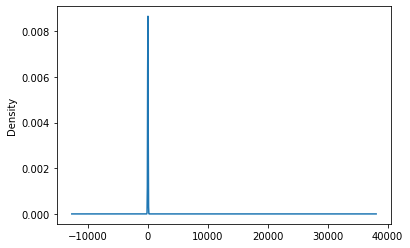

In [52]:
# Visualize the value counts
ASK_AMT_counts.plot.density()

The returned data suggests that the ASK_AMT column should be removed from our analysis

In [53]:
# Remove the column
df8.drop(columns=["ASK_AMT"], inplace=True)


In [54]:
# Return df8
df8.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### **Next we analyse the IS_SUCCESSFUL column**

In [55]:
IS_SUCCESSFUL_counts = df.IS_SUCCESSFUL.value_counts()
IS_SUCCESSFUL_counts

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

the dataset returned only two values, it will be considered for our model

In [56]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df8.IS_SUCCESSFUL.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['IS_SUCCESSFUL'])
encode_df.head()

,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [57]:
# Merge
charity_df = df8.merge(encode_df,left_index=True,right_index=True).drop("IS_SUCCESSFUL",1)

In [58]:
# return df8
charity_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### **Dataframe information**
- dataframe data type
- variable list
- column unique values

In [59]:
charity_df.dtypes

APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64


In [60]:
# Categorical variable list
df_cat = charity_df.dtypes[charity_df.dtypes == "float64"].index.tolist()
df_cat

['APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'STATUS_0',
 'STATUS_1',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',
 'SPECIAL_CONSIDERATIONS_Y',
 'IS_SUCCESSFUL_0

In [61]:
# Unique numbers, must be < 10
charity_df[df_cat].nunique()

APPLICATION_TYPE_Other          2
APPLICATION_TYPE_T19            2
APPLICATION_TYPE_T3             2
APPLICATION_TYPE_T4             2
APPLICATION_TYPE_T5             2
APPLICATION_TYPE_T6             2
AFFILIATION_CompanySponsored    2
AFFILIATION_Family/Parent       2
AFFILIATION_Independent         2
AFFILIATION_National            2
AFFILIATION_Other               2
AFFILIATION_Regional            2
CLASSIFICATION_C1000            2
CLASSIFICATION_C1200            2
CLASSIFICATION_C2000            2
CLASSIFICATION_C2100            2
CLASSIFICATION_C3000            2
CLASSIFICATION_Other            2
USE_CASE_CommunityServ          2
USE_CASE_Heathcare              2
USE_CASE_Other                  2
USE_CASE_Preservation           2
USE_CASE_ProductDev             2
ORGANIZATION_Association        2
ORGANIZATION_Co-operative       2
ORGANIZATION_Corporation        2
ORGANIZATION_Trust              2
STATUS_0                        2
STATUS_1                        2
INCOME_AMT_0  

#### **Split our trining and testing data**
- We need to split our training and testing data before fitting our **StandardScaler instance**. This prevents testing data from influencing the standardization function.
- To build our training and testing datasets, we need to separate two values:
- input values (which are our independent variables commonly referred to as model features or “X” in TensorFlow documentation (Links to an external site.))
- target output (our dependent variable commonly referred to as target or “y” in TensorFlow documentation)


In [62]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL_0"].values
X = charity_df.drop(["IS_SUCCESSFUL_0","IS_SUCCESSFUL_1"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

- **To apply our standardization, we need to create a StandardScaler instance by adding and running the following code:**
    - **Once we have our StandardScalerinstance, we need to fit the input data by adding and running the next line of code:**
        - **Create StandardScaler instance**
        - **fit the StandardScaler**
        - **Scale the data**

In [63]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### **Tasks**
At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:
- For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.
- In our hidden layers, our deep learning model structure will be slightly different—we’ll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we’ll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
- In the output layer, we’ll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an employee is at risk for attrition.


#### **Define Model**
- Deep neural net
- First hidden layer
- Second hidden layer
- Output layer
- Check the structure of the model

In [64]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


Now it is time to compile our model and define the loss and accuracy metrics. Since we want to use our model as a binary classifier, we’ll use the **binary_crossentropy loss function**, **adam optimizer**, and **accuracy metrics**, which are the same parameters we used for our basic neural network. To compile the model, add and run the following code:

#### **Compile neural network**
- Use **adam optimizer**, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and feature
- The **loss metric** is used by machine learning algorithms to score the performance of the model through each iteration and **epoch** by evaluating the inaccuracy of a single input.
- Use **binary_crossentropy**, which is specifically designed to evaluate a binary classification mode

In [65]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#### **Train Model**
Training and evaluating the deep learning model is no different from a basic neural network. Depending on the complexity of the dataset, we may opt to increase the number of epochs to allow for the deep learning model more opportunities to optimize the weight coefficients. To train our model, we must add and run the following code:

In [66]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100) #epochs (run through the data)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5951 - accuracy: 0.7002
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5693 - accuracy: 0.7262
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5639 - accuracy: 0.7303
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5612 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5590 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5579 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7321: 0s -
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7329
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5552 - 

In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5541 - accuracy: 0.7259
Loss: 0.5540636777877808, Accuracy: 0.7259474992752075


Using the checkpoints, we were able to regenerate the model instantaneously and confirm the model was able to produce the exact same results. Looking at the model training output, we know that the loss metric varied slightly from the predictive accuracy. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs

#### **Question**
- Do your best to optimize your model training and input data to achieve a target predictive accuracy higher than 75%.

Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on **73%** of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning mode. As seen from the results of the **Deep Learning** model metrics, the observation made was that the model correctly identified successful applications at **73%** of the time

In [68]:
# Define model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


The summary returned the number of weight parameters for each layer which equals to the number of input valuse by the number of neurons. first layer has 41 input values, and multiplied by the eight neurons gives us a total of 328 weight parameters.

# **Summary Building Neural Networks**

### **Building Neural Networks Tasks**
- **Create dummy dataset with Scikit-learn make_blob method**
    - Generate dummy dataset
    - Create dataframe with dummy data
    - plot the dummy data
- **Use Sklearn train_test_split method to split data into training and test**
    - X_train, X_test, y_train, y_test 
- **Prepare dataset for neural network model**
    - Normalize or standardize our numerical variables
- **Create a Keras Sequentail model(add layers) for our new neural network model**
    - The **nn_model** object will store the entire architecture of our neural network model
    - Add layers to our Sequential model using **Keras Dense class**
- **Compile Neural Network**

-----------------------------------------------------------------------------------------------------------------------------------------------
#### **Give Model a Synaptic Boost**
**There are a few means of optimizing a neural network:**
- Check out your input dataset.
- Add more neurons to a hidden layer.
- Add additional hidden layers.
- Use a different activation function for the hidden layers.
- Add additional epochs to the training regimen.


- It is important to use an activation function that matches the complexity of the input data. 
- If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

- 1) The **sigmoid function** values are normalized to a probability between 0 and 1, which is ideal for binary classification.
- 2) The **tanh function** can be used for classification or regression, and it expands the range between -1 and 1.
- 3) The **ReLU function** is ideal for looking at positive nonlinear input data for classification or regression.
- 4) The **Leaky ReLU function** is a good alternative for nonlinear input data with many negative inputs.

#### **Add Additional Epochs to Training Regimen**
If your model still requires optimizations and tweaking to meet desired performance, you can increase the number of epochs, or training iterations. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients.

In [69]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6962
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5702 - accuracy: 0.7255: 
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5638 - accuracy: 0.7266
Epoch 4/200
804/804 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.72 - 1s 1ms/step - loss: 0.5605 - accuracy: 0.7287
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7297
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7307
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7313
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7304
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7322
Epoch 10/200
804/804 [=========================

In [74]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7243
Loss: 0.5572721362113953, Accuracy: 0.7243148684501648


After adding more epochs and running it again; the deep learning model's performance metrics indicated that the model was able to identify sucessful applicants that if funded by Alphabet Soup produced an accuracy of 72% . When we compared both results, first model = 0.7259 and second model = 0.7243 whch was less than the first one meaning the second model was a less reliable classifier

In [75]:
# Define model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


Once we have defined the file structure and filepath, we need to create a **callback object** for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process.There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:

In [77]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

- filepath=checkpoint_path—the checkpoint directory and file structure we defined previously
- verbose=1—we’ll be notified when a checkpoint is being saved to the directory
- save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
 - save_freq=1000—checkpoints will be saved every thousand samples tested (across all epochs)

In [78]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 1.1578 - accuracy: 0.6996
Epoch 2/100
179/804 [=====>........................] - ETA: 0s - loss: 0.7833 - accuracy: 0.7182
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.7130
Epoch 3/100
357/804 [============>.................] - ETA: 0s - loss: 0.6210 - accuracy: 0.7180
Epoch 00003: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6199 - accuracy: 0.7177
Epoch 4/100
551/804 [===================>..........] - ETA: 0s - loss: 0.5956 - accuracy: 0.7174
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5926 - accuracy: 0.7221
Epoch 5/100
765/804 [===========================>..] - ETA: 0s - loss: 0.5786 - accuracy: 0.7213
Epoch 00005: saving model to checkpoints/weights.05.hdf5
804/804 [=======

Now if we ever need to restore weights, we can use the Keras Sequential model’s load_weights method to restore the model weights. To test this functionality, let’s define another deep learning model, but restore the weights using the checkpoints rather than training the model. 

In [79]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [80]:
# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5575 - accuracy: 0.7263
Loss: 0.5574710369110107, Accuracy: 0.7262973785400391


When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress. For example, if we wanted to visualize our model’s loss over the full 100 epochs, we can run the following code in our notebooks:

#### **Produce DataFrame History**
- plot loss
- plot accuracy

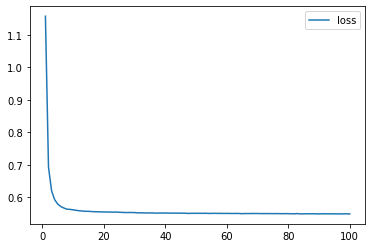

In [82]:
# Create DataFrame history
# Create a DataFrame containing training history
df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
df.plot(y="loss")

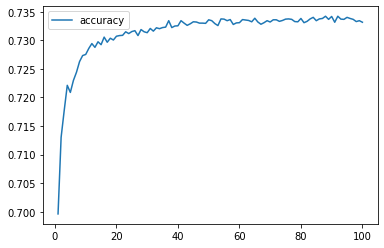

In [85]:
# Plot the accuracy
df.plot(y="accuracy")

In [86]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

A file named **trained_attrition.h5** was outputed to our folder

#### **Performance Test**

In [87]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [89]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5575 - accuracy: 0.7263
Loss: 0.5574710369110107, Accuracy: 0.7262973785400391


**The Evaluation returned the same performance metrics as the previous one**